In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mean_shift as ms
import pylab

pylab.rcParams['figure.figsize'] = (10, 6)

In [2]:
def get_image_data(data, image_id):
    dataset_name = data.keys()[0]
    name = data[dataset_name][image_id]['image'][0][0]
    fixations = data[dataset_name][image_id]['gaze'][0]['fixation'][0]
    locations = data[dataset_name][image_id]['gaze'][0]['location'][0]
    timestamps = data[dataset_name][image_id]['gaze'][0]['timestamp'][0]
    size = data[dataset_name][image_id]['resolution'][0][0]
    return name, fixations, locations, timestamps, size

 # Returns the index of the image
def image_index(name, train):

    images = train['training']

    names = []
    for i in range(len(images)):
         names.append(train['training'][i]['image'][0][0])
    image_id = names.index(name)

    return image_id



def unique_rows(a):
    a = a.astype(int)
    mask = np.ones(len(a), dtype=bool) # True indica els valors que ens quedem

    for i in range(len(a)):
        if i != 0:
            if np.equal(a[i], a[i-1])[0]:
                mask[i] = False

    return a[mask]

def get_ordered_fixations_with_meanshift(locations,timestamps, bandwidth,img_PATH):

    # Create array to store fixations
    meanshift_fixations = np.copy(locations)

    for i in range(len(locations)):
        X = np.hstack([locations[i], timestamps[i]])

        mean_shifter = ms.MeanShift(kernel='multivariate_gaussian')
        mean_shift_result = mean_shifter.cluster(X, kernel_bandwidth = bandwidth)

        original_points =  mean_shift_result.original_points
        shifted_points = mean_shift_result.shifted_points
        #print original_points
        #print shifted_points
        cluster_assignments = mean_shift_result.cluster_ids
        meanshift_fixations[i] = unique_rows(shifted_points[:,:2])
        print ("User "+str(i))
        print meanshift_fixations[i]
        x = original_points[:,0]
        y = original_points[:,1]
        Cluster = cluster_assignments
        centers = meanshift_fixations[i]
        fig = plt.figure()
        img=plt.imread(img_PATH)
        plt.title('User '+str(i))
        ax = fig.add_subplot(1,1,1)
        ax.imshow(img)
        scatter = ax.scatter(x,y,c=Cluster,s=50)
        for i,j in centers:
            ax.scatter(i,j,s=50,c='red',marker='+')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.colorbar(scatter)
        fig.savefig("mean_shift_result_sun_bddsxnnygsvvhprp"+str(i))


    return meanshift_fixations

In [6]:
# Load training data
MAT_TRAIN_SUN = 'training.mat'
train = scipy.io.loadmat(MAT_TRAIN_SUN)

train['training'].shape[0]

5999
User 0
[[263 183]
 [143 196]
 [ 62 279]
 [266 161]
 [402 175]
 [347 172]]
User 1
[[260 212]
 [191 235]
 [264 224]
 [441 266]
 [323 237]
 [169 228]
 [271 241]]
User 2
[[253 194]
 [151 194]
 [313 195]
 [422 176]
 [439 114]
 [421 195]]


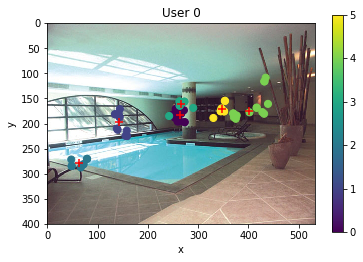

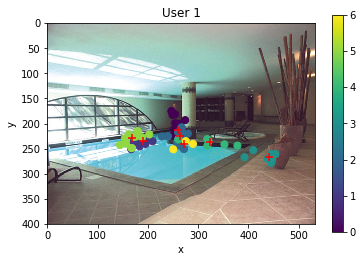

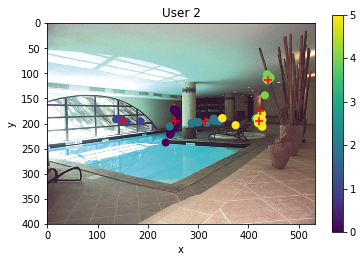

In [8]:
# Load training data
MAT_TRAIN_SUN = 'training.mat'
train = scipy.io.loadmat(MAT_TRAIN_SUN)

# Choose an image

image_id = image_index('sun_astrhnaxddmzxgvo', train)
print image_id

# Prepare data of the image

name, fixations, locations, timestamps, size = get_image_data(train, image_id)

iSUN_PATH = '../../Datasets/iSUN'
IMAGE_PATH = iSUN_PATH +'/images/%s.jpg'% name

# Create array and compute ordered fixations
meanshift_fixations = get_ordered_fixations_with_meanshift(locations, timestamps, [32,32,200],IMAGE_PATH)

[[ 141.15216863  111.71041269    0.        ]
 [ 141.70512995  113.42052837   34.        ]
 [ 141.70512995  113.42052837   81.        ]
 [ 142.84326355  108.91446249  119.        ]
 [ 142.84326355  108.91446249  151.        ]
 [ 148.26882813  104.57225117  203.        ]
 [ 151.59183106  101.97908393  236.        ]
 [ 151.59183106  101.97908393  268.        ]
 [ 153.35648642  101.43432906  333.        ]
 [ 152.81245786  108.30955243  369.        ]
 [ 152.81245786  108.30955243  401.        ]
 [ 152.81245786  108.30955243  464.        ]
 [ 139.51119612  100.84818415  503.        ]
 [ 100.62238072   70.33775365  536.        ]
 [ 100.62238072   70.33775365  599.        ]
 [  98.39767583   76.14714568  636.        ]
 [  87.26517077   41.23486558  669.        ]
 [  86.17225742   48.99363282  732.        ]
 [  84.32816705   41.39294284  770.        ]
 [  84.82829355   43.16520181  803.        ]
 [  84.82829355   43.16520181  864.        ]
 [  87.85169036   37.89179623  904.        ]
 [  88.607

[[1.48355381e+02 1.20369851e+02 0.00000000e+00]
 [1.48355381e+02 1.20369851e+02 2.70000000e+01]
 [1.49459903e+02 1.23177585e+02 7.60000000e+01]
 [1.49108040e+02 1.24374246e+02 1.12000000e+02]
 [1.49108040e+02 1.24374246e+02 1.42000000e+02]
 [1.49487936e+02 1.25953642e+02 2.05000000e+02]
 [1.46257929e+02 1.21736859e+02 2.46000000e+02]
 [1.46257929e+02 1.21736859e+02 2.79000000e+02]
 [1.50581561e+02 1.15564788e+02 3.38000000e+02]
 [1.50581561e+02 1.15564788e+02 3.75000000e+02]
 [1.51415809e+02 1.12618723e+02 4.12000000e+02]
 [1.51415809e+02 1.12618723e+02 4.69000000e+02]
 [1.70608345e+02 1.23699121e+02 5.13000000e+02]
 [1.70608345e+02 1.23699121e+02 5.46000000e+02]
 [1.70608345e+02 1.23699121e+02 6.03000000e+02]
 [1.79857941e+02 1.32876149e+02 6.47000000e+02]
 [1.79857941e+02 1.32876149e+02 6.76000000e+02]
 [1.77522529e+02 1.33662162e+02 7.38000000e+02]
 [1.77522529e+02 1.33662162e+02 9.09000000e+02]
 [1.72168946e+02 1.04285868e+02 9.47000000e+02]
 [1.72168946e+02 1.04285868e+02 9.760000

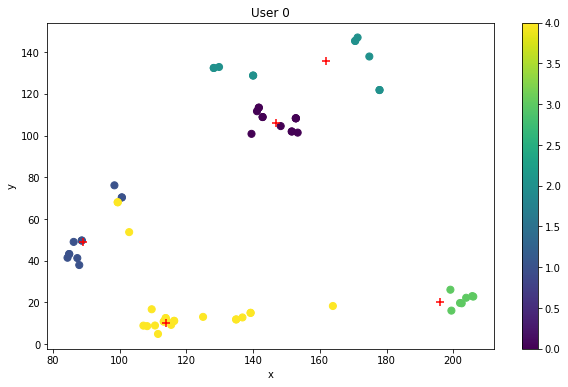

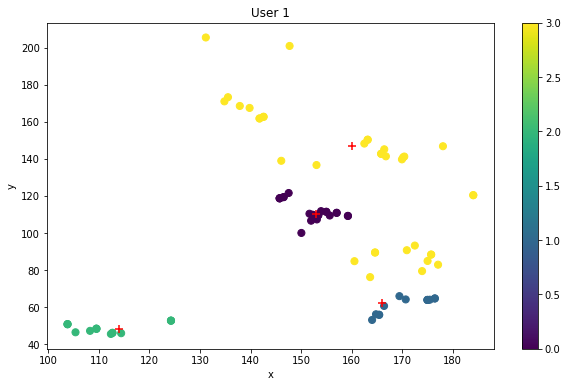

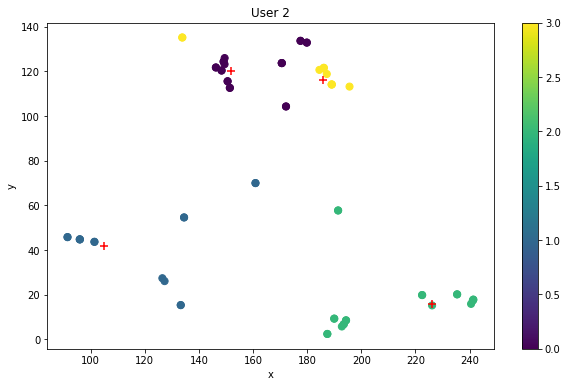

In [ ]:
# Create array and compute ordered fixations
meanshift_fixations = get_ordered_fixations_with_meanshift(locations, timestamps, [32,32,200])